# Job Attrition Prediction Model

Data source:
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

About Dataset
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

## Importing required libraries

In [1]:
import numpy as np 
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

> Ignoring any kind of unwanted warings in while analysing dataset.


In [2]:
warnings.filterwarnings('ignore')

## Data Analysis

### Studying Data Labels 

In [3]:
jAttr_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
jAttr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
jAttr_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.49,403.51,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.19,8.11,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.91,1.02,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.87,602.02,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.72,1.09,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.89,20.33,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.73,0.71,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.06,1.11,1.0,1.00,2.0,3.00,5.0


### Checking and removing unnecessary features

In [5]:
jAttr_data['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

***- From above observations it can be concluded that the EmployeeCount column has only one value and hence is a insignificant column for prediction purpose and needs to be dropped.***

In [6]:
jAttr_data['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

***- A similar thing can be observed in the column of Over18. Which indicates all the employees are Over 18 years of age and hence the column need not to be considered for model training purpose.***

***- Employee Number has nothing to do with the Attrition hence it can be safely dropped.***

In [7]:
jAttr_data['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

***- This value can also be droped as entire column has same value***

([<matplotlib.patches.Wedge at 0x26c1988e3d0>],
 [Text(-1.1, 1.3471114790620887e-16, '')])

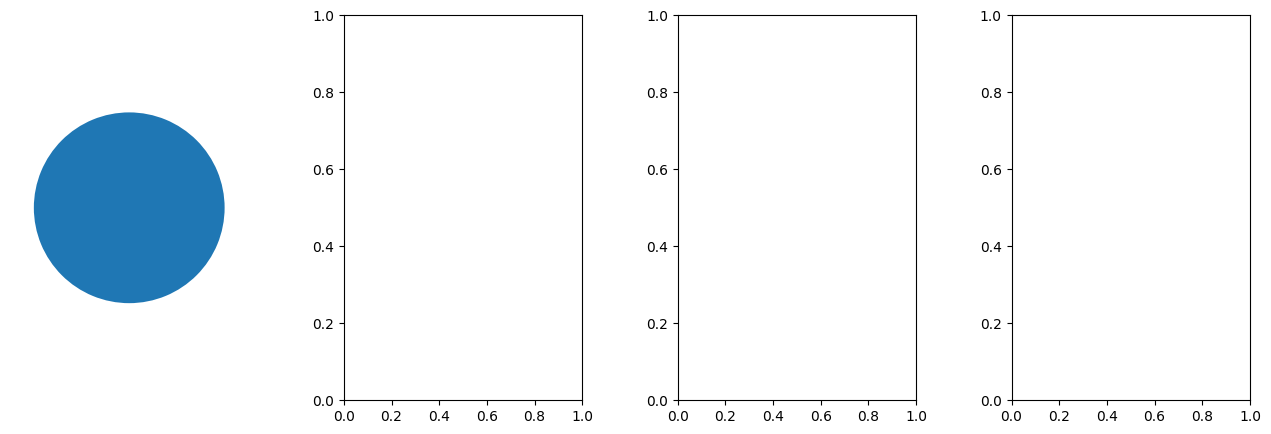

In [8]:
fig,axes= plt.subplots(nrows=1, ncols= 4, figsize=(16,5))
fig.subplots_adjust(wspace=0.4)
axes[0].pie(jAttr_data['EmployeeCount'].value_counts())



In [9]:
jAttr_data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)
jAttr_data.dtypes.sort_values()

Age                          int64
YearsInCurrentRole           int64
YearsAtCompany               int64
WorkLifeBalance              int64
TrainingTimesLastYear        int64
TotalWorkingYears            int64
StockOptionLevel             int64
RelationshipSatisfaction     int64
PerformanceRating            int64
PercentSalaryHike            int64
NumCompaniesWorked           int64
MonthlyRate                  int64
MonthlyIncome                int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
JobLevel                     int64
JobInvolvement               int64
HourlyRate                   int64
EnvironmentSatisfaction      int64
Education                    int64
DistanceFromHome             int64
DailyRate                    int64
JobSatisfaction              int64
JobRole                     object
OverTime                    object
Gender                      object
EducationField              object
Department                  object
BusinessTravel      

### Checking the distribution of Target variable-'Attrition' 

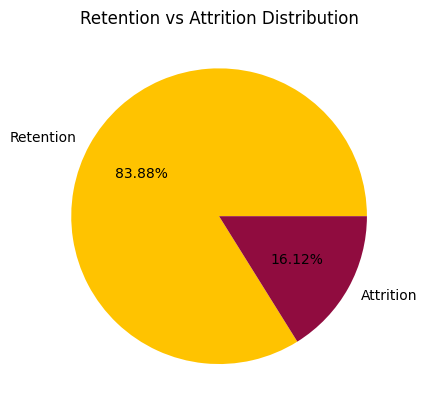

In [10]:
attrition_counts = jAttr_data['Attrition'].value_counts()
labels = ['Retention', 'Attrition']
# plt.pie(attrition_counts, labels=labels, autopct='%1.2f%%',colors=['blue','red'])
plt.pie(attrition_counts, labels=labels, autopct='%1.2f%%', colors=['#FFC300', '#900C3F'])
plt.title('Retention vs Attrition Distribution')
plt.show()

> 16.12% employees have left the company.

<Axes: xlabel='Age', ylabel='Count'>

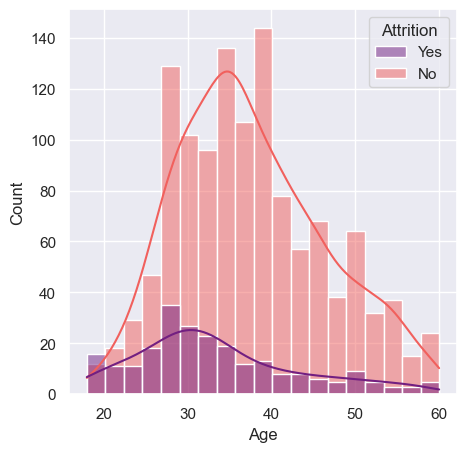

In [56]:
plt.figure(figsize = (5, 5))
sns.histplot(x='Age', hue='Attrition', data=jAttr_data, kde=True, palette='magma')


> Major Attrition can be seen in the age group of 26-38.<br/>Also it can be noted that most of the employees are below age of 50. 

### Analyzing other aspects of Dataset

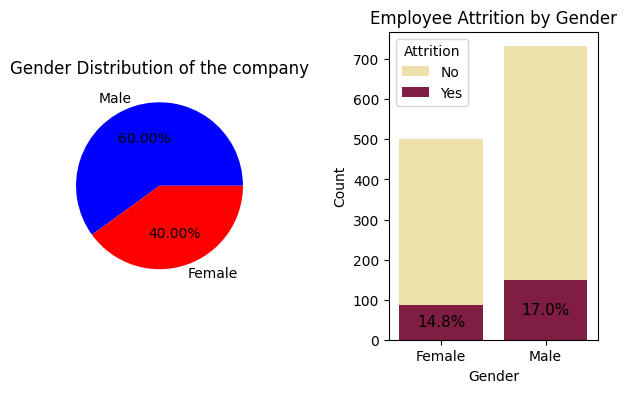

In [12]:
gender_counts = jAttr_data['Gender'].value_counts()
labels = ['Male', 'Female']
fig, axes =plt.subplots(nrows=1, ncols=2, figsize=(7,4))
fig.subplots_adjust(wspace=0.6)
axes[0].pie(gender_counts, labels=labels, autopct='%1.2f%%',colors=['blue','red'])
axes[0].set_title('Gender Distribution of the company')

# Create a pivot table with counts of Attrition by Gender
pivot_table = jAttr_data.pivot_table(index='Gender', columns='Attrition', aggfunc='size')

# Calculate the percentage of attrition in male and female
total_by_gender = pivot_table.sum(axis=1)
attrition_percent = pivot_table['Yes'] / total_by_gender * 100

# Create a stacked bar chart
ax = sns.barplot(x=pivot_table.index, y=pivot_table.values[:, 0], color='#F9E79F', label='No')
ax = sns.barplot(x=pivot_table.index, y=pivot_table.values[:, 1], color='#900C3F', label='Yes')

# Add text annotations with the percentage of attrition
for i, v in enumerate(attrition_percent):
    ax.text(i, pivot_table.values[i, 1]/2, f'{v:.1f}%', ha='center', va='center', fontsize=11)

# Add legend, title, and axis labels to the chart
plt.legend(title='Attrition')
plt.title('Employee Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

> Company has more male employees than female and attrition rate in males are slightly greater.

<Axes: xlabel='DistanceFromHome', ylabel='count'>

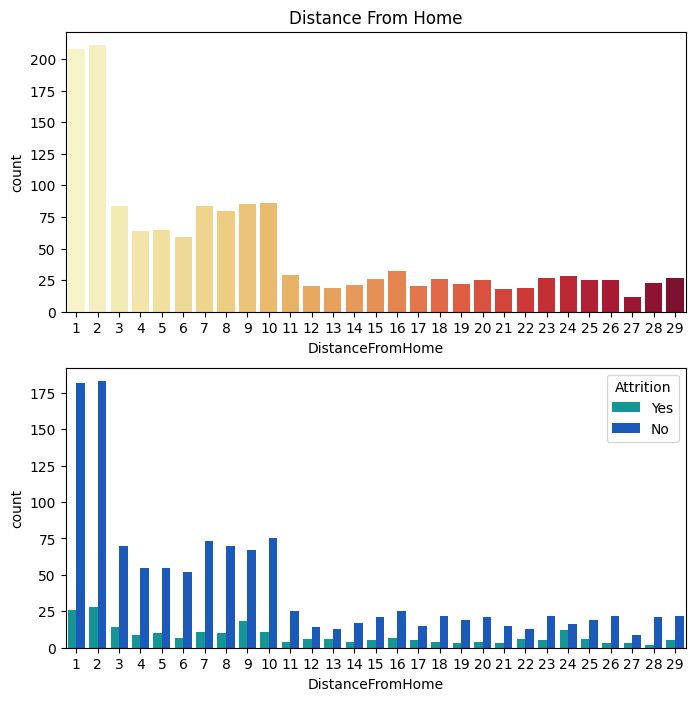

In [13]:
plt.figure(figsize = (8 , 8))
plt.subplot(2 ,1,1)
sns.countplot(x= 'DistanceFromHome' ,data =jAttr_data ,palette='YlOrRd')
plt.title('Distance From Home')
plt.subplot(2,1,2)
sns.countplot(x= 'DistanceFromHome' ,data = jAttr_data ,palette='winter_r'  ,hue =jAttr_data['Attrition'])

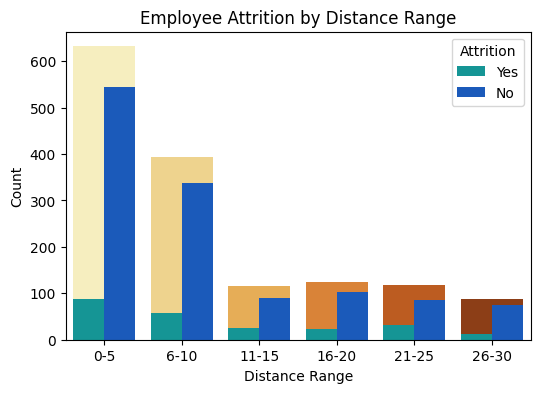

In [14]:
# Create bins based on distance ranges
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']
jAttr_data['DistanceRange'] = pd.cut(jAttr_data['DistanceFromHome'], bins=bins, labels=labels)

plt.figure(figsize = (6 , 4))

# fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(8,8))

sns.countplot(data=jAttr_data,x='DistanceRange',palette='YlOrBr')
# axes[0].set_title('Distance From Home categorial')

# Create a histogram with distance ranges and hue by Attrition
sns.countplot(data=jAttr_data, x='DistanceRange', hue='Attrition', palette='winter_r')

# Add a title and axis labels
plt.title('Employee Attrition by Distance Range')
plt.xlabel('Distance Range')
plt.ylabel('Count')

# Display the chart
plt.show()

jAttr_data.drop(['DistanceRange'],axis =1, inplace=True)

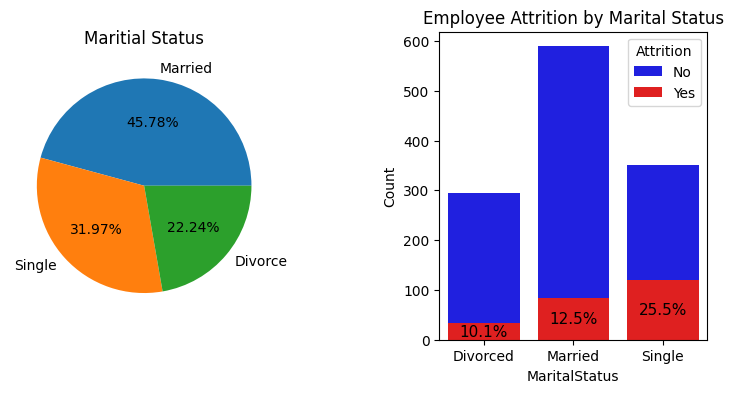

In [15]:
marital_status_count = jAttr_data['MaritalStatus'].value_counts()
labels=['Married','Single','Divorce']
fig, axes =plt.subplots(nrows=1, ncols=2, figsize=(9,4))
fig.subplots_adjust(wspace=0.6)

axes[0].pie(marital_status_count, labels=labels, autopct='%1.2f%%')
axes[0].set_title('Maritial Status')


# Create a pivot table with counts of Attrition by Gender
pivot_table = jAttr_data.pivot_table(index='MaritalStatus', columns='Attrition', aggfunc='size')

# Calculate the percentage of attrition in male and female
total_by_MaritalStatus = pivot_table.sum(axis=1)
attrition_percent = pivot_table['Yes'] / total_by_MaritalStatus * 100

# Create a stacked bar chart
ax = sns.barplot(x=pivot_table.index, y=pivot_table.values[:, 0], color='blue',  label='No')
ax = sns.barplot(x=pivot_table.index, y=pivot_table.values[:, 1], color= 'red' ,label='Yes')

# Add text annotations with the percentage of attrition
for i, v in enumerate(attrition_percent):
    ax.text(i, pivot_table.values[i, 1]/2, f'{v:.1f}%', ha='center', va='center', fontsize=11)

# Add legend, title, and axis labels to the chart
plt.legend(title='Attrition')
plt.title('Employee Attrition by Marital Status')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')

plt.show()

> In singles attrition % is maximum

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

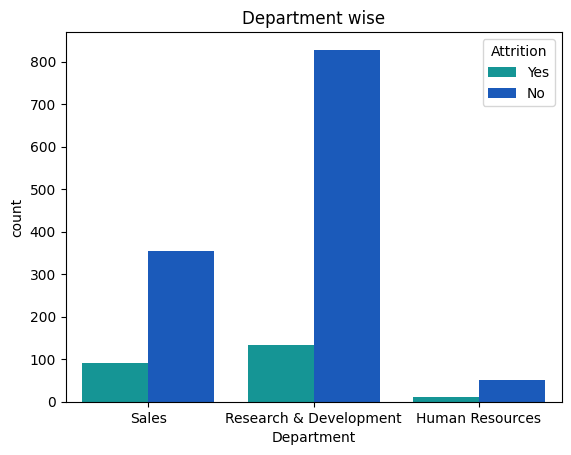

In [16]:
sns.countplot(data=jAttr_data, x="Department", hue="Attrition", palette='winter_r')
plt.title('Department wise')
jAttr_data['Department'].value_counts()

Text(0.5, 1.0, 'Job role wise')

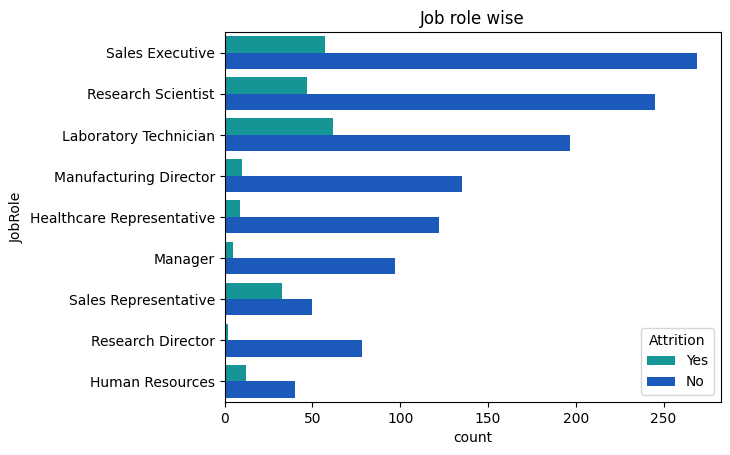

In [17]:
sns.countplot(y= 'JobRole' ,data = jAttr_data ,palette='winter_r'  ,hue ='Attrition')
plt.title('Job role wise')


> Based on the countplot with percentage labels, it appears that the job roles of 'sales executive', 'sales representative', and 'lab technician' have higher proportions of employees leaving the company, compared to other job roles. This suggests that the company may want to focus on retaining employees in these particular roles.

<Axes: xlabel='OverTime', ylabel='count'>

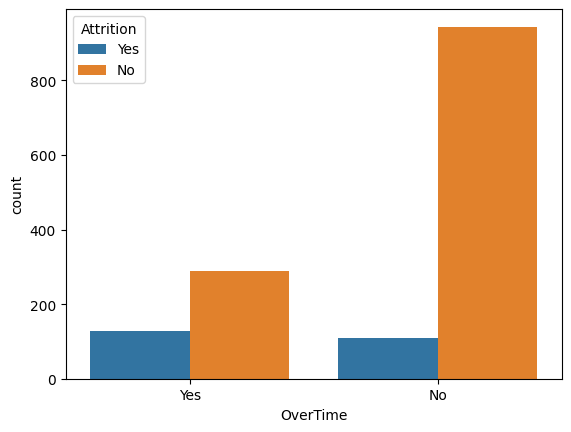

In [18]:
sns.countplot(data=jAttr_data, x="OverTime", hue="Attrition")

> No significant difference observed

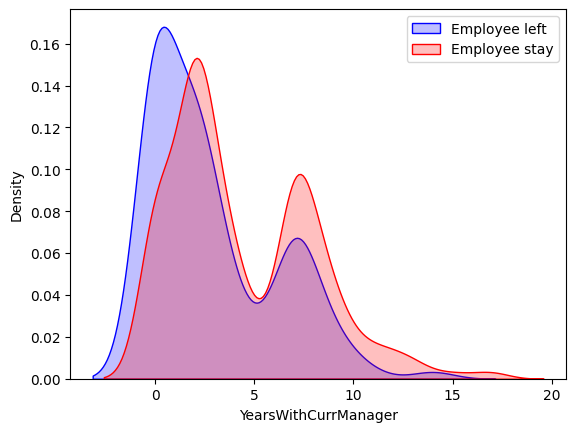

In [19]:
data_left=jAttr_data[jAttr_data[ 'Attrition']=='Yes']['YearsWithCurrManager'] 
data_stay=jAttr_data[jAttr_data[ 'Attrition']=='No']['YearsWithCurrManager'] 

sns.kdeplot(data_left, label = 'Employee left', fill=True, color = 'b' )
sns.kdeplot(data_stay, label = 'Employee stay', fill=True, color = 'r')
plt.legend()
plt.show()


In [20]:
df=jAttr_data.copy()
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [21]:
df['Education'].replace([1,2,3,4,5],["Below College","College"," Bachelor","Master","Doctor"],inplace=True)
df['EnvironmentSatisfaction'].replace([1,2,3,4,],["Low ","Medium"," High","Very High"],inplace=True)
df['JobInvolvement'].replace([1,2,3,4],["Low ","Medium"," High","Very High"],inplace=True)
df['JobSatisfaction'].replace([1,2,3,4],["Low ","Medium"," High","Very High"],inplace=True)
df['PerformanceRating'].replace([1,2,3,4],["Low ","Good"," Excellent"," Outstanding"],inplace=True)
df['RelationshipSatisfaction'].replace([1,2,3,4],["Low ","Medium"," High","Very High"],inplace=True)
df['WorkLifeBalance'].replace([1,2,3,4,],["Bad ","Good"," Better"," Best"],inplace=True)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


1: Below College
2: College
3: Bachelor
4: Master
5: Doctor


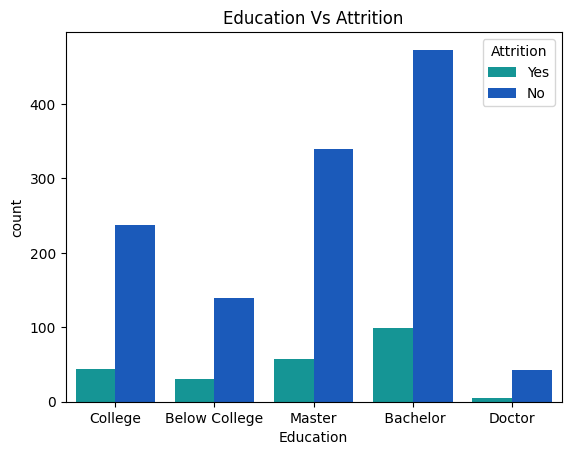

In [22]:
labels=["Below College","College","Bachelor","Master","Doctor"]
for i in range(len(labels)):
    print(f"{i+1}: {labels[i]}")
sns.countplot(x= 'Education' ,data =df ,palette='winter_r',hue='Attrition')
plt.title('Education Vs Attrition')
plt.show()

>Employees who hold a Bachelor's degree are more likely to leave the company compared to those with other degrees.

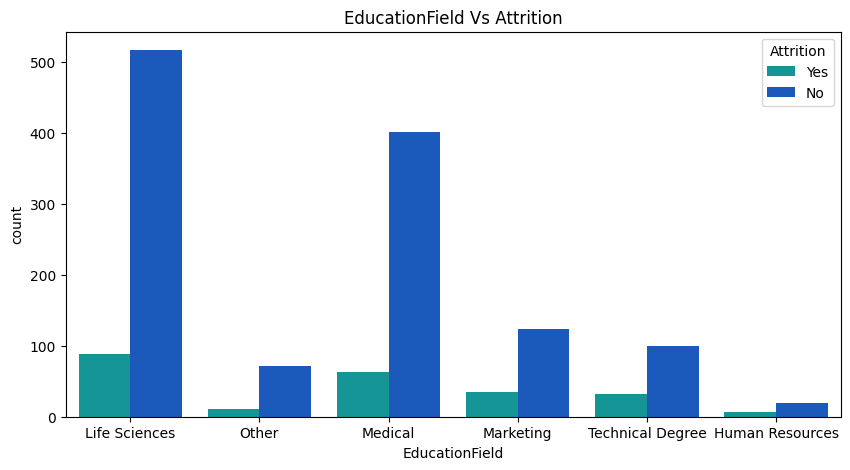

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'EducationField' ,data =df ,palette='winter_r',hue='Attrition')
plt.title('EducationField Vs Attrition')
plt.show()

> Attrition is high in Life Sciences

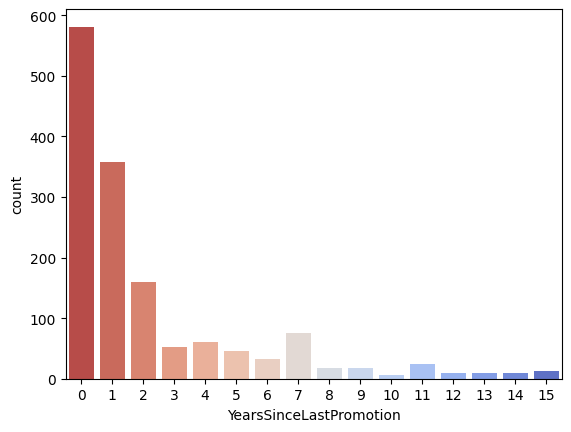

In [24]:
sns.countplot(x= 'YearsSinceLastPromotion' ,data = df ,palette='coolwarm_r'  )
plt.show()

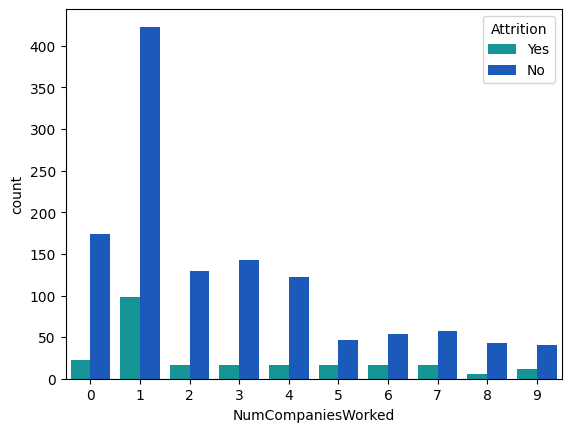

In [25]:
sns.countplot(x= 'NumCompaniesWorked' ,data =df ,palette='winter_r',hue='Attrition')
plt.show()

> Employee who have completed 1 year have maximum attrition rate.

## String encoding for dataset 

In [26]:
df.describe(include = "object")

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,5,6,4,2,4,9,4,3,2,2,4,4
top,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,High,Male,High,Sales Executive,Very High,Married,No,Excellent,High,Better
freq,1233,1043,961,572,606,453,882,868,326,459,673,1054,1244,459,893


In [27]:
cat_cols = ["BusinessTravel", "Department", "Education", "EducationField", "EnvironmentSatisfaction", "Gender", "JobInvolvement", "JobRole", "JobSatisfaction", "MaritalStatus", "OverTime", "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance"]
# Dictionary to hold the LabelEncoder objects
label_encoders = {}

# Loop over the categorical columns and fit the LabelEncoder objects
for col in cat_cols:
    le = LabelEncoder()
    le.fit(df[col])
    label_encoders[col] = le

# Dictionary to hold the mapping of label encoded values to original values
labels = {}

# Loop over the label encoders and add the mapping to the labels dictionary
for col, le in label_encoders.items():
    labels[col] = dict(zip(le.transform(le.classes_), le.classes_))

# Print the mapping of label encoded values to original values for each column
# print(labels)

label_mapping = {'BusinessTravel': {0: 'Non-Travel', 1: 'Travel_Frequently', 2: 'Travel_Rarely'},
                 'Department': {0: 'Human Resources', 1: 'Research & Development', 2: 'Sales'},
                 'Education': {0: ' Bachelor', 1: 'Below College', 2: 'College', 3: 'Doctor', 4: 'Master'},
                 'EducationField': {0: 'Human Resources', 1: 'Life Sciences', 2: 'Marketing', 3: 'Medical', 4: 'Other', 5: 'Technical Degree'},
                 'EnvironmentSatisfaction': {0: ' High', 1: 'Low ', 2: 'Medium', 3: 'Very High'},
                 'Gender': {0: 'Female', 1: 'Male'},
                 'JobInvolvement': {0: ' High', 1: 'Low ', 2: 'Medium', 3: 'Very High'},
                 'JobRole': {0: 'Healthcare Representative', 1: 'Human Resources', 2: 'Laboratory Technician', 3: 'Manager', 4: 'Manufacturing Director', 5: 'Research Director', 6: 'Research Scientist', 7: 'Sales Executive', 8: 'Sales Representative'},
                 'JobSatisfaction': {0: ' High', 1: 'Low ', 2: 'Medium', 3: 'Very High'},
                 'MaritalStatus': {0: 'Divorced', 1: 'Married', 2: 'Single'},
                 'OverTime': {0: 'No', 1: 'Yes'},
                 'PerformanceRating': {0: ' Excellent', 1: ' Outstanding'},
                 'RelationshipSatisfaction': {0: ' High', 1: 'Low ', 2: 'Medium', 3: 'Very High'},
                 'WorkLifeBalance': {0: ' Best', 1: ' Better', 2: 'Bad ', 3: 'Good'}}

# Swap keys and values of nested dictionaries
swapped_label_mapping = {k: {v2: v1 for v1, v2 in v.items()} for k, v in label_mapping.items()}

# Print the swapped label mapping
print(swapped_label_mapping)


{'BusinessTravel': {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}, 'Department': {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}, 'Education': {' Bachelor': 0, 'Below College': 1, 'College': 2, 'Doctor': 3, 'Master': 4}, 'EducationField': {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}, 'EnvironmentSatisfaction': {' High': 0, 'Low ': 1, 'Medium': 2, 'Very High': 3}, 'Gender': {'Female': 0, 'Male': 1}, 'JobInvolvement': {' High': 0, 'Low ': 1, 'Medium': 2, 'Very High': 3}, 'JobRole': {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}, 'JobSatisfaction': {' High': 0, 'Low ': 1, 'Medium': 2, 'Very High': 3}, 'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2}, 'OverTime': {'No': 0, 'Yes': 1}, 'PerformanceRating': {' Excel

In [28]:
Attrition_le=LabelEncoder()
BusinessTravel_le=LabelEncoder()
Department_le=LabelEncoder()
Education_le=LabelEncoder()
EducationField_le=LabelEncoder()
EnvironmentSatisfaction_le=LabelEncoder()
Gender_le=LabelEncoder()
JobInvolvement_le=LabelEncoder()
JobRole_le=LabelEncoder()
JobSatisfaction_le=LabelEncoder()
MaritalStatus_le=LabelEncoder()
Over18_le=LabelEncoder()
OverTime_le=LabelEncoder()
PerformanceRating_le=LabelEncoder()
RelationshipSatisfaction_le=LabelEncoder()
WorkLifeBalance_le=LabelEncoder()

In [29]:
df['Attrition'] = Attrition_le.fit_transform(df['Attrition'])
df['BusinessTravel'] = BusinessTravel_le.fit_transform(df['BusinessTravel'])
df['Department'] = Department_le.fit_transform(df['Department'])
df['Education'] = Education_le.fit_transform(df['Education'])
df['EducationField'] = EducationField_le.fit_transform(df['EducationField'])
df['EnvironmentSatisfaction'] = EnvironmentSatisfaction_le.fit_transform(df['EnvironmentSatisfaction'])
df['Gender'] = Gender_le.fit_transform(df['Gender'])
df['JobInvolvement'] = JobInvolvement_le.fit_transform(df['JobInvolvement'])
df['JobRole'] = JobRole_le.fit_transform(df['JobRole'])
df['JobSatisfaction'] = JobSatisfaction_le.fit_transform(df['JobSatisfaction'])
df['MaritalStatus'] = MaritalStatus_le.fit_transform(df['MaritalStatus'])
df['OverTime'] = OverTime_le.fit_transform(df['OverTime'])
df['PerformanceRating'] = PerformanceRating_le.fit_transform(df['PerformanceRating'])
df['RelationshipSatisfaction'] = RelationshipSatisfaction_le.fit_transform(df['RelationshipSatisfaction'])
df['WorkLifeBalance'] = WorkLifeBalance_le.fit_transform(df['WorkLifeBalance'])

In [30]:
# temp
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.0,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.0,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,1.680272,1.639316,0.0,0.0,1.0,4.00,4.0
EducationField,1470.0,2.247619,1.331369,0.0,1.0,2.0,3.00,5.0
EnvironmentSatisfaction,1470.0,1.493878,1.214123,0.0,0.0,1.0,3.00,3.0
Gender,1470.0,0.600000,0.490065,0.0,0.0,1.0,1.00,1.0


**This graphs gives us idea that all the remaining features are some how related to the Target Variable**

## Splitting Training and Testing data

In [31]:
X=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [32]:
X_train ,X_test ,y_train ,y_test=train_test_split(X,y ,test_size=0.2,random_state=42)

In [33]:
X_train.shape, y_train.shape

((1176, 30), (1176,))

In [34]:
X_test.shape, y_test.shape

((294, 30), (294,))

In [35]:
X_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Training Data and testing data seperated**

Train a Random Forest Classifier

In [36]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Make predictions on the test set

In [37]:
y_pred = rfc.predict(X_test)

Evaluate the model's performance

In [38]:
accuracy = accuracy_score(y_test, y_pred) *100
print(f'Accuracy: {accuracy:.2f}%\n')
print(classification_report(y_test, y_pred))

Accuracy: 88.10%

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



Calculate and plot the confusion matrix

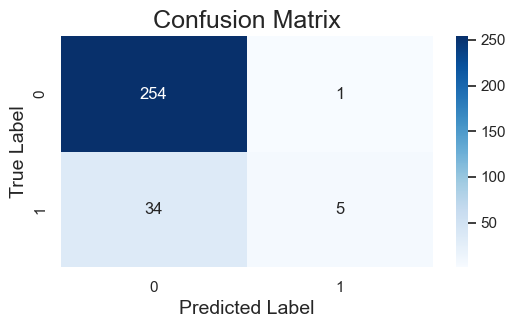

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1) # Adjust font size
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()


Plot feature importance

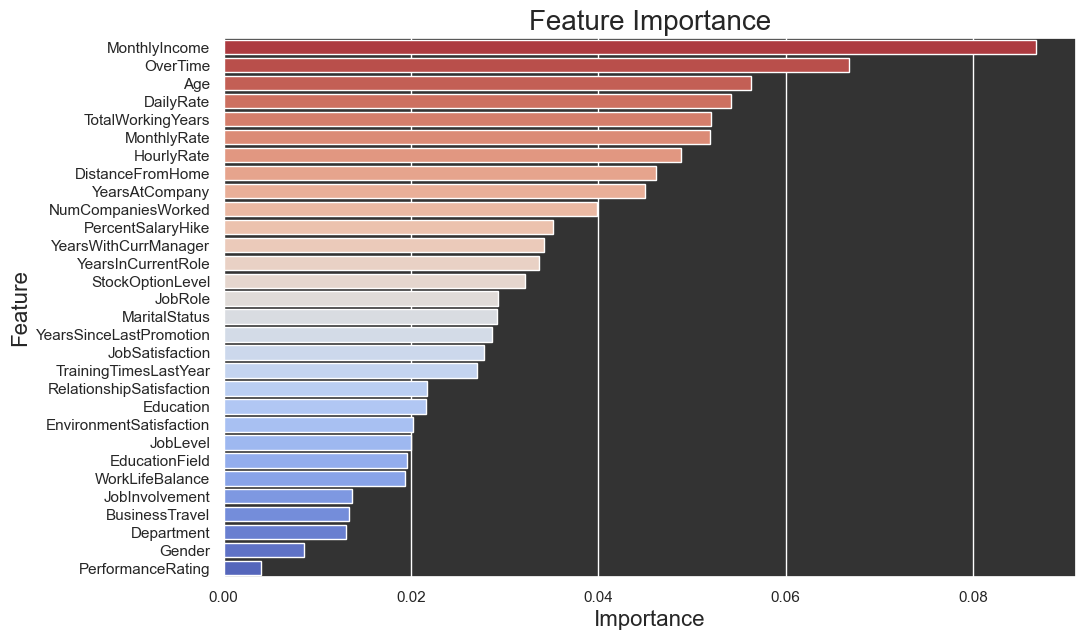

In [64]:
feat_importance = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importance_sorted = feat_importance.sort_values(ascending=False)

plt.figure(figsize=(11, 7))
sns.barplot(
    x=feat_importance_sorted.values,
    y=feat_importance_sorted.index,
    palette="coolwarm_r"
)

plt.title("Feature Importance", fontsize=20)
plt.xlabel("Importance", fontsize=16)
plt.ylabel("Feature", fontsize=16)

# Customize the plot background color
plt.gca().set_facecolor('#333333')  # Set the background color to a darker shade

plt.show()

Compute ROC curve and ROC area for each class

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize=(10,6)) # Set figure size
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=14)
plt.show()


Plot Precision-Recall curve

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve')
plt.plot([0, 1], [0.5, 0.5],'r--', label='Random Guessing')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=18)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(loc="lower left", fontsize=12)
plt.show()

Compute average precision score

In [ ]:
# Compute average precision score
avg_precision = average_precision_score(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(10,6)) # Set figure size
step_kwargs = {'step': 'post'}
plt.step(recall, precision, color='blue', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(avg_precision), fontsize=20)
plt.show()

## Creating Joblib file to web based prediction

In [ ]:
import joblib

joblib.dump(rfc, './website/model.joblib')
